In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from analysis_functions import Analysis

2023-06-13 16:37:21.087300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-13 16:37:21.087336: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
results_path = "../../results/observables_uqc/uqc_2qubits_5layers_XX"

results = Analysis(results_path)

In [3]:
def flatten_gradients(gradients):
    for i in range(len(gradients)):
        for j in range(len(gradients[i])):
            gradients[i][j] = np.concatenate([lista.flatten() for lista in gradients[i][j]], axis = 0)


In [4]:
#gradients is a list of lists containing the gradients of each agent at every training step

gradients = results.get_gradients()

min_length = min([len(gradients[i]) for i in range(len(gradients))])

gradients = [gradients[i][:min_length] for i in range(len(gradients))]

flatten_gradients(gradients)

gradients_array = np.array(gradients)
print(gradients_array.shape)

magnitudes_gradients = np.linalg.norm(gradients_array, axis = 2)
print(magnitudes_gradients.shape)

mean_magnitudes_gradients = np.mean(magnitudes_gradients, axis = 0)
print(mean_magnitudes_gradients.shape)

std_magnitudes_gradients = np.std(magnitudes_gradients, axis = 0)
print(std_magnitudes_gradients.shape)

(5, 17447, 61)
(5, 17447)
(17447,)
(17447,)


In [7]:
mean_gradients, std_gradients = results.calculate_mean_variance_gradients()

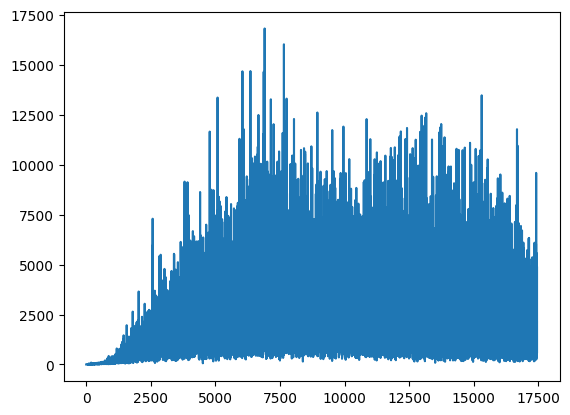

In [41]:
plt.plot(std_magnitudes_gradients)